# Import Some Libraries

In [1]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                
import matplotlib.pyplot as plt        
%matplotlib inline 
import warnings                        

# About Company

 Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# Problem

 Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### So we have to predict wheather loan is approved or not using given data

# Read Train & Test data

In [2]:
train_data = pd.read_csv("train_ctrUa4K.csv")
print("Shape of train data is :", train_data.shape)
train_data.head()

Shape of train data is : (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv("test_lAUu6dG.csv")
print("Shape of test data is :", test_data.shape)
test_data.head()

Shape of test data is : (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Conclusion :

* There is total of 614 rows in train data and 367 rows in test data. Train data contain Loan_Status which is our target 

# Hypothesis Generation

#### Let generate some hypothesis by some domain knowlegde and just looking on data

1. Dependents : If a person is depends on more number of members or their relatives, the chances of loan approval is less. Let's take an example if we take two people who apply for loan, if on one people their is total of 3 dependents( their famil members) and for another if their is no one dependents (means all members earn money) then chances that this member can pay loan is more so cances for loan approval is high.

2. Education : If a person is educated than he can pay EMI on time or chances of loan to be pay is more ie, chances for loan approval is more.

3. Self_Employed : If a person is self empployed than their maybe some chances that his/her buisness fails or they were not able to pay their loan as compare to one who is not self employed and work for some other company or organization.

4. ApplicantIncome : If a person earn more we can conclude that he will able to repay loan so chances of loan approval is more.

5. LoanAmount : If amount of loan to be payed is less then their is high chances that loan be payed so chances for loan approval is also high.

6. Loan_Amount_Term : If loan taken for less time and have less amount then chances of loan approval is more.

7. Credit_History : If people repayed all of their previous debts (loans) then chances that he will get loan is more ie, cahnces that loan is approved is more.

8. EMI : If a person takes loan and if his monthly EMI to be payed is less then chances for loan to be payed on time is more, so chances for loan approval is high.

9. CoapplicantIncome : A co-applicant refers to a person who applies along with the borrower for a loan. This is done so that the income of the co-applicant can be used to supplement the borrower’s income and increase his/her eligibility. So if  CoapplicantIncome is more than chances for loan approval is more.

### So these are 9 hypothesis that I generates from my domain knowledge now validate our hypothesis to check if they are right or wrong.

# Look on data

In [4]:
print("Train Data-set contain these columns :", train_data.columns)

Train Data-set contain these columns : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
print("Test Data-set contain these columns :", test_data.columns)

Test Data-set contain these columns : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


### Check informaion about data like null values and data types of columns

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Conclusions : 

1. There is total of 3 types of data types of columns : Object, int64 and float4 in both train and test data-sets.
   Out of which ApplicantIncome is int64 and CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History is float64 and rest are object.

2. There are some features which contain Null values in both train and test data-sets like : Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History in train data-set & Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History in test data-set                 

### Impute missing values using mode (most_frequent) for categorical feature and median (because of outliers we choose median as median is robust to outliers) for numerical features.

* For train : 

  caegorical : Gender, Married, Dependents, Self_Employed, Credit_History, Loan_Amount_Term.
  
  numerical : LoanAmount


* For test:

  categorical : Gender, Dependents, Self_Employed,Loan_Amount_Term, Credit_History.
  
  numerical : LoanAmount

In [10]:
# For Train

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

# For Test

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [11]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Univariate Analysis

In [12]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [13]:
# Look on target variable

print("Percentage of Yes is {0} or No is {1} for target".format(train_data.Loan_Status.value_counts(normalize = True)[0]*100,train_data.Loan_Status.value_counts(normalize = True)[1]*100))

Percentage of Yes is 68.72964169381108 or No is 31.27035830618892 for target


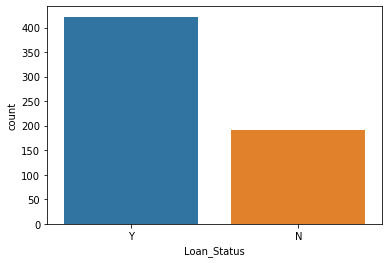

In [14]:
sns.countplot(x = 'Loan_Status', data = train_data)

* There are total of 68.72 % of target is Yes while 31.2 % are No

## Perform univariate analysis on numerical feaures : ApplicantIncome, CoapplicantIncome, LoanAmount 

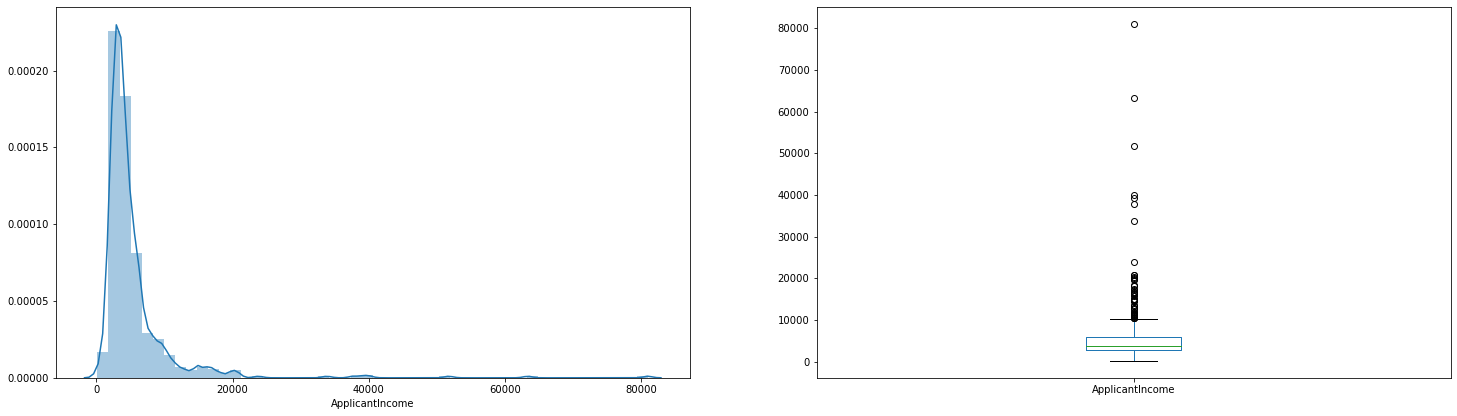

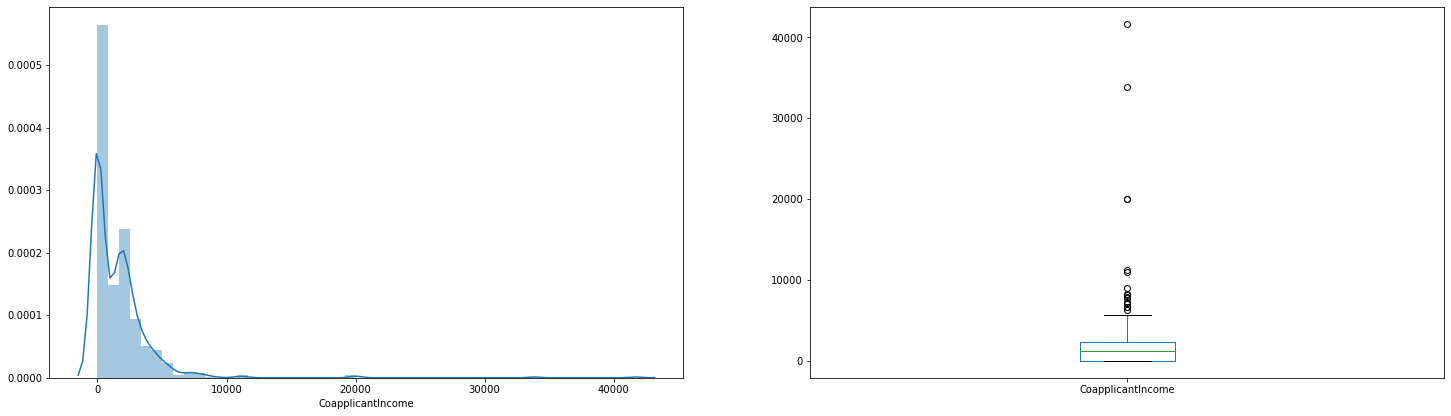

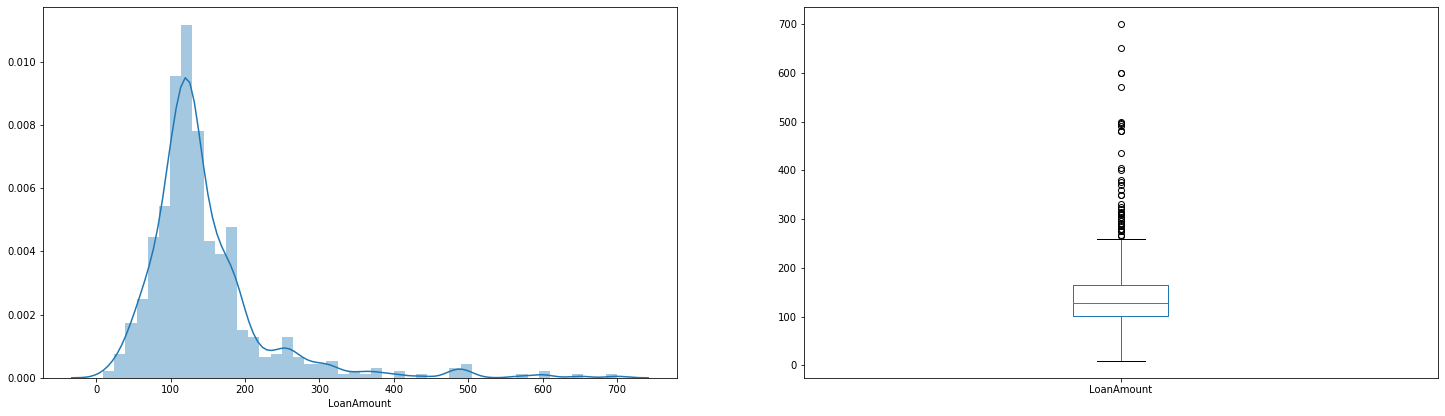

In [15]:
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]


for x in numeric_columns:
    f = plt.figure()
    f.set_size_inches(25,15)
    plt.subplot(2,2,1)
    sns.distplot(train_data[x])
    plt.subplot(2,2,2)
    train_data[x].plot.box()
    plt.show()

### Distribution :

* ApplicantIncome, CoapplicantIncome are not normally distributed in them there are small number of people which have large income and large number of people have lower income which is like in log distributions.

* CoapplicantIncome is fairly normal

### Outliers : 

* From above box plots we can see all ApplicantIncome, CoapplicantIncome, LoanAmount contains outliers so we have to remove them. 

## Perform univariate analysis on Categorical feaures : Gender, Self_Employed, Married, Credit_History, Education

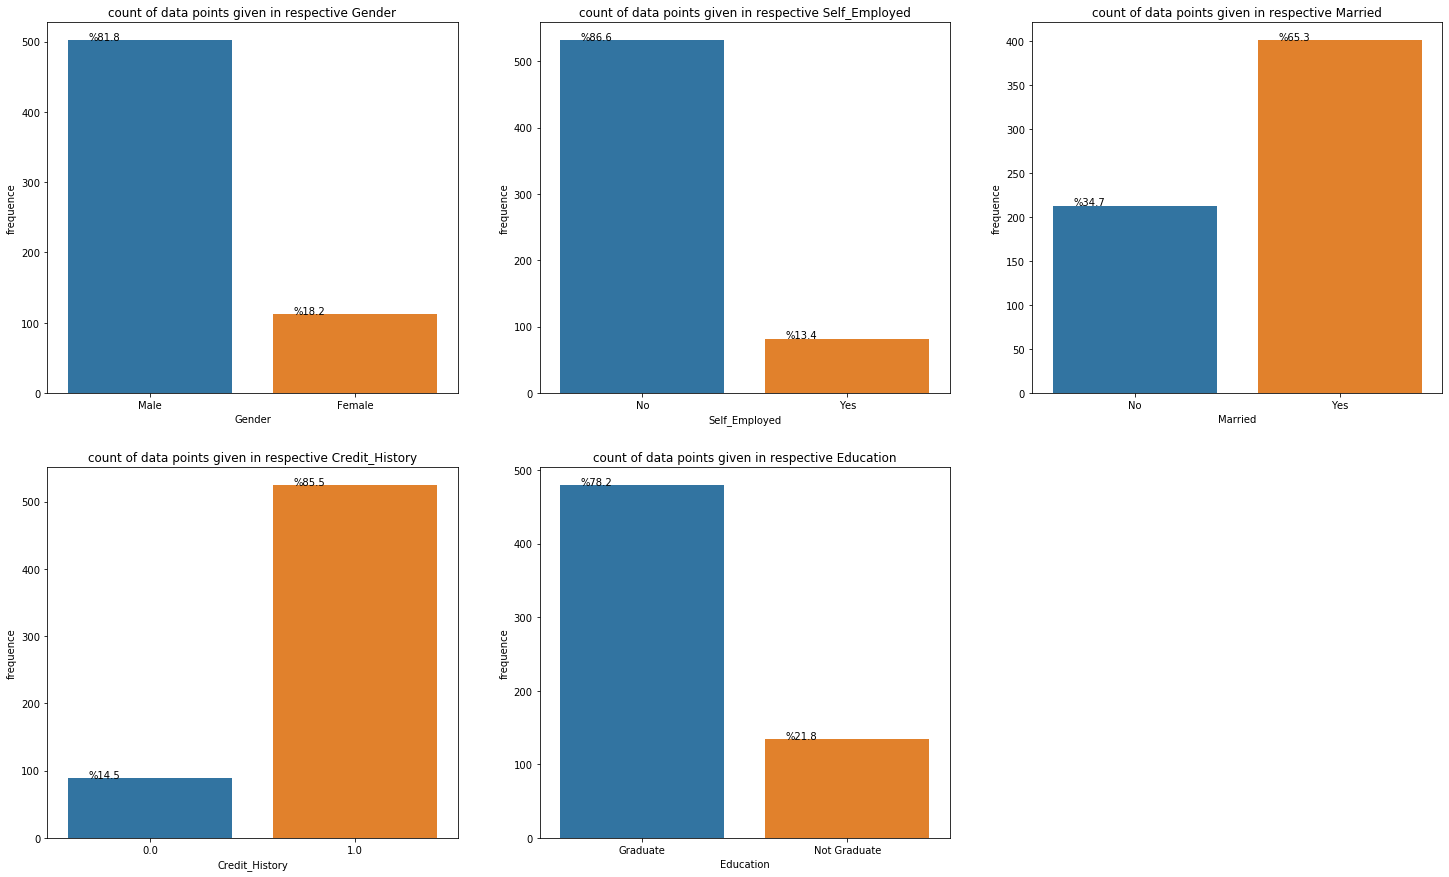

In [16]:
f = plt.figure()
f.set_size_inches(25,15)

plt.subplot(2,3,1)
ax = sns.countplot(x = 'Gender', data = train_data)
plt.title('count of data points given in respective Gender')
plt.xlabel('Gender')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))

plt.subplot(2,3,2)
ax = sns.countplot(x = 'Self_Employed', data = train_data)
plt.title('count of data points given in respective Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))

plt.subplot(2,3,3)
ax = sns.countplot(x = 'Married', data = train_data)
plt.title('count of data points given in respective Married')
plt.xlabel('Married')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))

plt.subplot(2,3,4)
ax = sns.countplot(x = 'Credit_History', data = train_data)
plt.title('count of data points given in respective Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))
        
plt.subplot(2,3,5)
ax = sns.countplot(x = 'Education', data = train_data)
plt.title('count of data points given in respective Education')
plt.xlabel('Education')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))

* 82 % of applicants are male

* Around 13 % applicants are self_employed

* Around 65 % applicants are married

* Arond 85 % applicants repay their loans sucessfully

* Arond 78 % applicants are graduated


## Perform univariate analysis on Ordinal feaures : Dependents, Property_Area

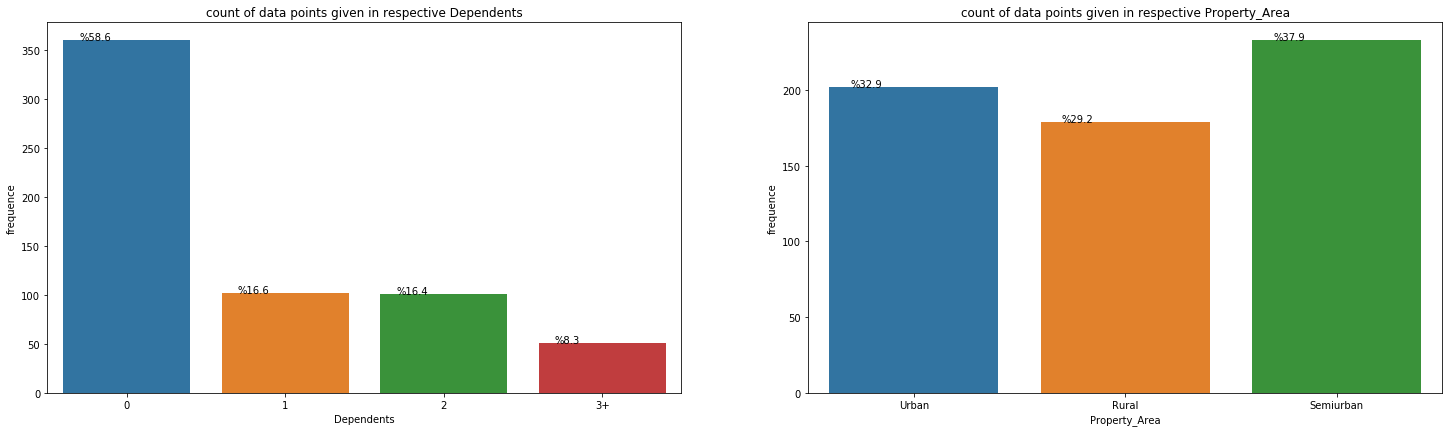

In [17]:
f = plt.figure()
f.set_size_inches(25,15)

plt.subplot(2,2,1)
ax = sns.countplot(x = 'Dependents', data = train_data)
plt.title('count of data points given in respective Dependents')
plt.xlabel('Dependents')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))

plt.subplot(2,2,2)
ax = sns.countplot(x = 'Property_Area', data = train_data)
plt.title('count of data points given in respective Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.1, p.get_height()))


* Most of the applicants don’t have any dependents (58 %)

* Most of the applicants are from Semiurban area (40)

# Bivariate Analysis

#### Now look on bivariate analysis and try to validate our hypothesis


1. Dependents : If a person is depends on more number of members or their relatives, the chances of loan approval is less. Let's take an example if we take two people who apply for loan, if on one people their is total of 3 dependents( their famil members) and for another if their is no one dependents (means all members earn money) then chances that this member can pay loan is more so cances for loan approval is high.

2. Education : If a person is educated than he can pay EMI on time or chances of loan to be pay is more ie, chances for loan approval is more.

3. Self_Employed : If a person is self empployed than their maybe some chances that his/her buisness fails or they were not able to pay their loan as compare to one who is not self employed and work for some other company or organization.

4. ApplicantIncome : If a person earn more we can conclude that he will able to repay loan so chances of loan approval is more.

5. LoanAmount : If amount of loan to be payed is less then their is high chances that loan be payed so chances for loan approval is also high.

6. Loan_Amount_Term : If loan taken for less time and have less amount then chances of loan approval is more.

7. Credit_History : If people repayed all of their previous debts (loans) then chances that he will get loan is more ie, cahnces that loan is approved is more.

8. EMI : If a person takes loan and if his monthly EMI to be payed is less then chances for loan to be payed on time is more, so chances for loan approval is high.

9. CoapplicantIncome : A co-applicant refers to a person who applies along with the borrower for a loan. This is done so that the income of the co-applicant can be used to supplement the borrower’s income and increase his/her eligibility. So if  CoapplicantIncome is more than chances for loan approval is more.

## Perform Bivariate analysis on Categorical feaures : Gender, Self_Employed, Married, Credit_History, Education

In [18]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


FOR  Gender


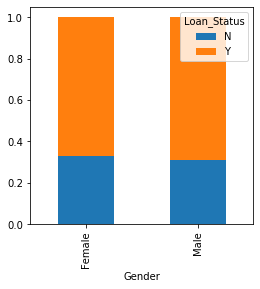

FOR  Self_Employed


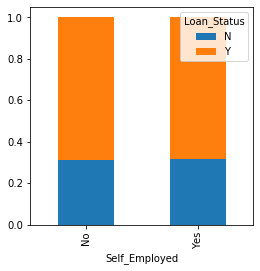

FOR  Married


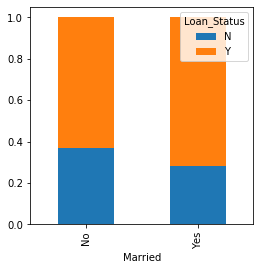

FOR  Credit_History


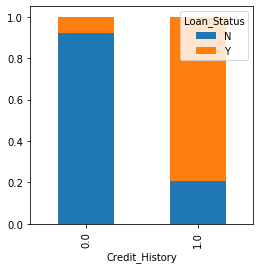

FOR  Education


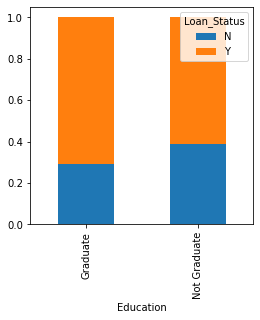

In [19]:
cat_columns = ["Gender", "Self_Employed", "Married","Credit_History","Education"]

for x in cat_columns:
    print("FOR ", x)
    
    plot = pd.crosstab(train_data[x],train_data['Loan_Status'])
    plot.div(plot.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    plt.show()

1. For Gender : Loan approved or not for both males and females are approximately same.


2. For Self_Employed : From above plot we can see for Self_Employed proportion of loan approved or not is same for both Self_Employed or not. So our hypothesis that if person is self eployed then their maybe chances that his business fails so loan approval maybe less is wrong.


3. For Married : Proportion of married applicants is higher for the approved loans.


4. For Credit_History : Our hypthesis that if person have repay all oh their debts than chances for loan approval is high is true as we can see from above plots person with Credit_History = 1 have more loan approvals.


5. For Education : Our hypothesis that loan approval for educated peoples are more as compare to not educated is true, from above lot we can see loan approvals for educated is high as compare to not educated

## Perform Bivariate analysis on Ordinal feaures : Dependents, Property_Area

FOR  Dependents


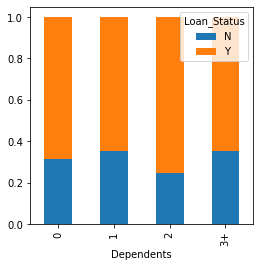

FOR  Property_Area


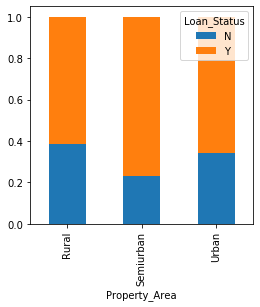

In [20]:
ord_columns = ["Dependents", "Property_Area"]

for x in ord_columns:
    print("FOR ", x)
    
    plot = pd.crosstab(train_data[x],train_data['Loan_Status'])
    plot.div(plot.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
    plt.show()

1. For Dependents : We can conclde from above plot that for dependents 1 and 3+ have same for both type of tagets and for 2 dependents chances for loan approval is high among all other dependents. Order of loan approval for dependents be like this : 2 > 0 > 1 =3+. So our hypithesis that if person have less number of dependents is wrong. 


2. For Property_Area : Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Perform Bivariate analysis on numerical feaures : ApplicantIncome, CoapplicantIncome, LoanAmount  

### Correlation matrix

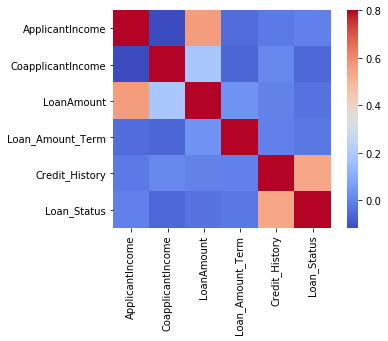

In [21]:
import pandas as pd
import numpy as np

train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

corr =train_data.corr()
sns.heatmap(corr, vmax=.8, square=True, cmap="coolwarm");
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


* We can conclude that (LoanAmount and AplicantIncome), (LoanAmount and CoAplicantIncome) and (Loan_Status and Credit_History) is correlated.

C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


For :  ApplicantIncome


<Figure size 1800x1080 with 0 Axes>

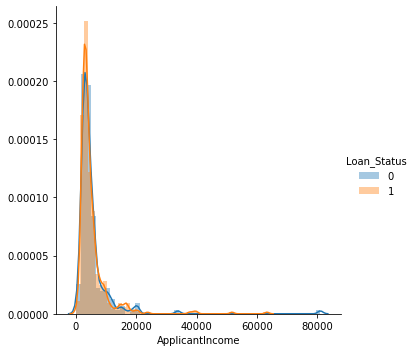

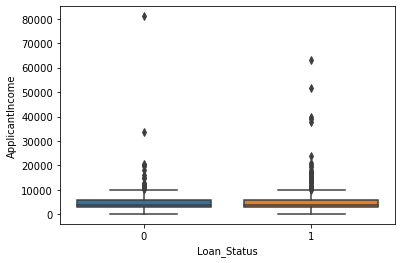

For :  CoapplicantIncome


C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x1080 with 0 Axes>

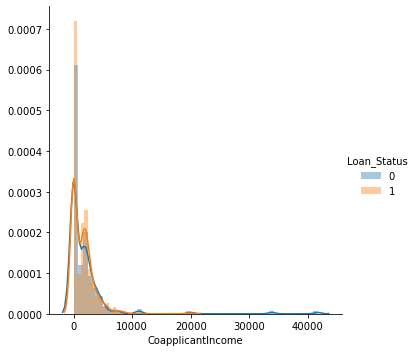

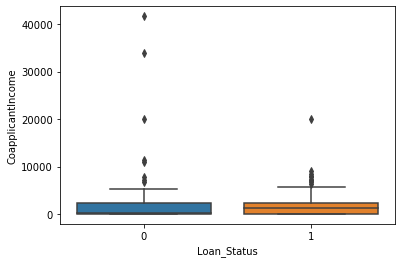

For :  LoanAmount


C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x1080 with 0 Axes>

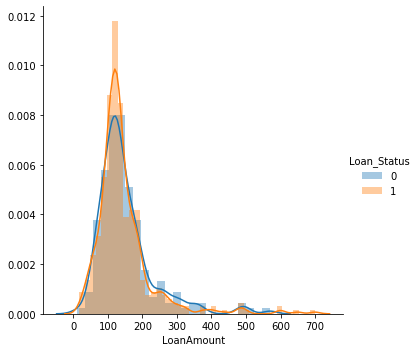

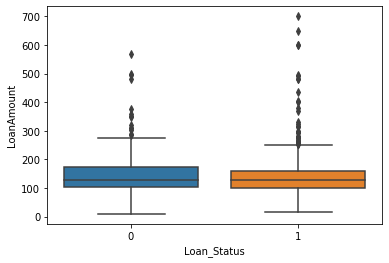

In [22]:
for x in numeric_columns:
    f = plt.figure()
    f.set_size_inches(25,15)
    print("For : ",x)
    sns.FacetGrid(train_data, hue="Loan_Status",size=5) \
       .map(sns.distplot, x) \
       .add_legend();
    plt.show(); 
   
    sns.boxplot(x='Loan_Status',y=x, data=train_data)
    plt.show()

## Above box plot cannot help much so we divide our numerical variables in chunks. 

In [23]:
min(train_data.ApplicantIncome),max(train_data.ApplicantIncome)

(150, 81000)

Text(0, 0.5, 'Percentage')

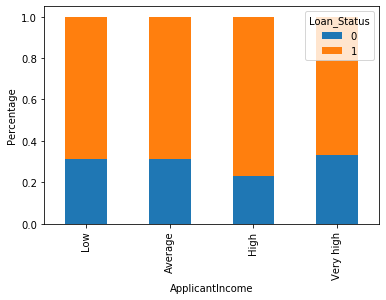

In [24]:
bins=[0,5000,15000,20000,81000]
group=['Low','Average','High', 'Very high']
train_data['Income_bin']=pd.cut(train_data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

* From above plot we can conclude our hypothesis for ApplicantIncome s no true. As we can see there are more number of peoples wih income in range of 20000 whose loans approved is more as compare to higher income.

* Many CoapplicantIncome is given to be zero so we cannot conclude from only CoapplicantIncome therefore we make a new feature called total income = CoapplicantIncome + ApplicantIncome

In [25]:
min(train_data.CoapplicantIncome),max(train_data.CoapplicantIncome)

(0.0, 41667.0)

Text(0, 0.5, 'Percentage')

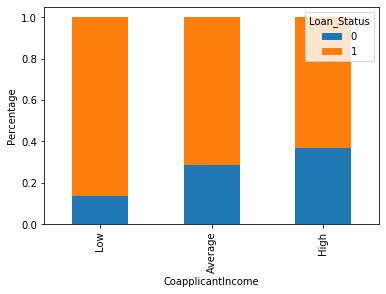

In [26]:
bins=[0,1000,5000,41667]
group=['Low','Average','High']
train_data['Coapplicant_Income_bin']=pd.cut(train_data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

* Because many coapplicants have zero vaue so above plot showing chances for loan approval is high for 0 coapplicant income

Text(0, 0.5, 'Percentage')

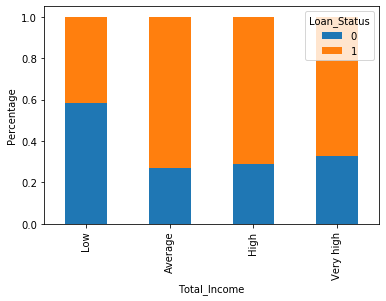

In [27]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_data['Total_Income_bin']=pd.cut(train_data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_data['Total_Income_bin'],train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

* Now we can conclude that people who have less income have low chances of loan approval as compare of higher income people

Text(0, 0.5, 'Percentage')

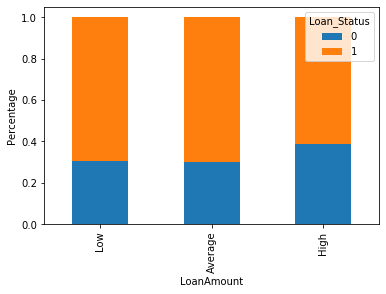

In [28]:
bins=[0,100,200,700] 
group=['Low','Average','High']
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

Our hypthesis for loan amount is true ie, people who take low amount loan have higher chances of approval

Text(0, 0.5, 'Percentage')

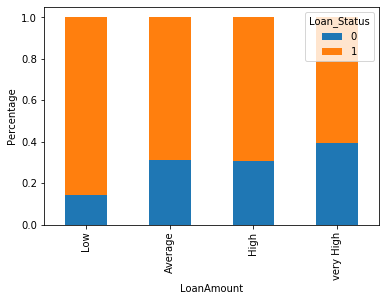

In [29]:
bins=[0,30,100,250,480] 
group=['Low','Average','High','very High']
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

* Our hypothesis that if time for loan taken is less than their is high chances that loan to be repayed is true

# Feature Engineering

### Now we can create some new features

1. Total_income = ApplicantIncome + CoapplicantIncome : From above plots we can see if Total_income is high then chances of loan approval is high.


2. EMI in thousands = LoanAmount / Loan_Amount_Term : If EMI is high then their is less chances that EMI be payed.


3. Income left = Total_income - EMI : It is income left after payment of EMI. If this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval. Generally bamk have interest rates for housing oans in betwween 7.5 - 9 % pa so for calculation of EMI I am taing 8 % pa.

* EMI = [P x R x (1+R)^N]/[(1+R)^N-1], where P stands for the loan amount or principal, R is the interest rate per month [if the interest rate per annum is 11%, then the rate of interest will be 11/(12 x 100)], and N is the number of monthly instalments.


In [30]:
def emi(p, r, t): 
    # for one month interest
    r = r/(12*100)  
    # for month period
    t = t
    emi = (p*r*pow(1+r,t))/(pow(1+r,t)-1) 
    return emi 

In [31]:
train_data['Total_Income']=train_data['ApplicantIncome']+train_data['CoapplicantIncome']
test_data['Total_Income']=test_data['ApplicantIncome']+test_data['CoapplicantIncome']

train_data['EMI']=emi(train_data['LoanAmount'],8,train_data['Loan_Amount_Term'])
test_data['EMI']=emi(test_data['LoanAmount'],8,test_data['Loan_Amount_Term'])

train_data['Income_left']=train_data['Total_Income']-(train_data['EMI']*1000) 
test_data['Income_left']=test_data['Total_Income']-(test_data['EMI']*1000)

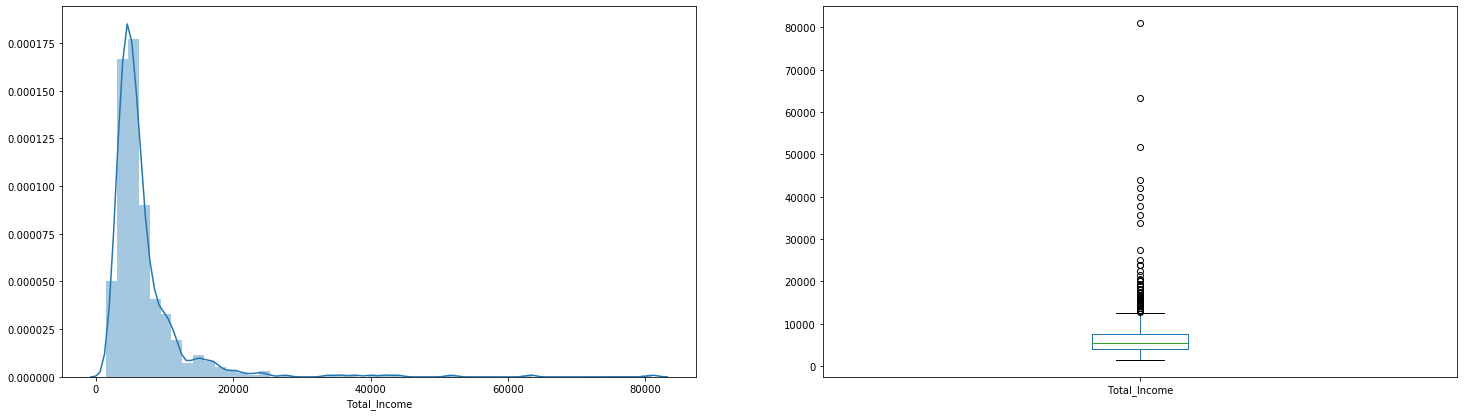

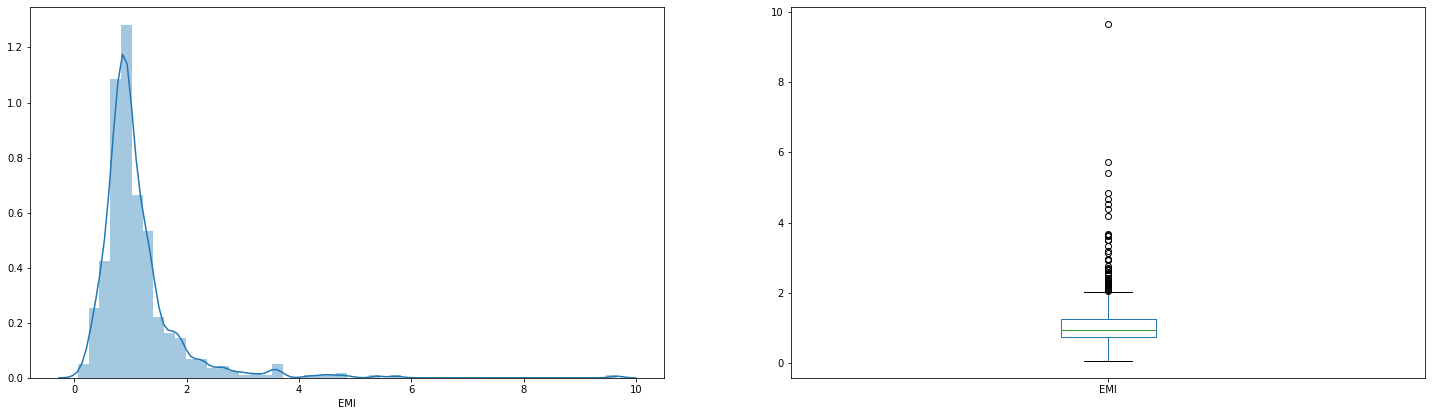

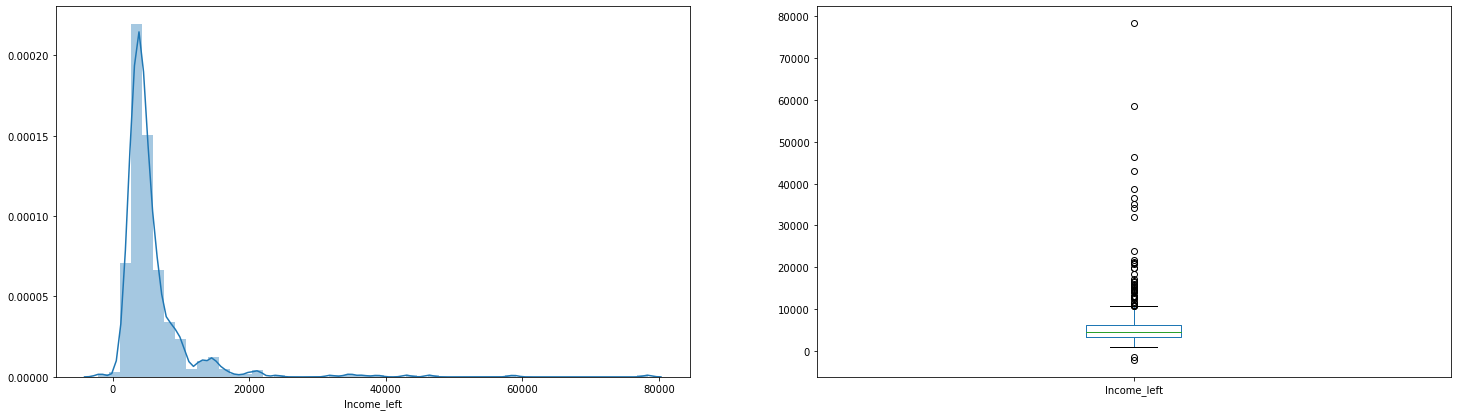

In [32]:
new_feature = ["Total_Income","EMI","Income_left"]


for x in new_feature:
    f = plt.figure()
    f.set_size_inches(25,15)
    plt.subplot(2,2,1)
    sns.distplot(train_data[x])
    plt.subplot(2,2,2)
    train_data[x].plot.box()
    plt.show()

From above we can see all of our engineered features are not normal distribution as well as have some outliers

# Look on EMI

Text(0, 0.5, 'Percentage')

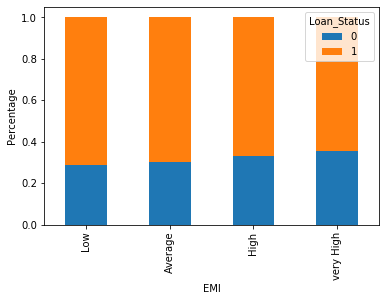

In [33]:
bins=[0,500,1000,3000,10000] 
group=['Low','Average','High','very High']
train_data['EMI_bin']=pd.cut(train_data['EMI']*1000,bins,labels=group)
LoanAmount_bin=pd.crosstab(train_data['EMI_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('EMI')
plt.ylabel('Percentage')

* We Can see Appicant who have low EMI have more loan approvals

# Log transform some features who contain outiers : LoanAmount, 

In [34]:
income_left = []
for i in train_data['Income_left']:
    if(i < 0):
        income_left.append(0)
    else:
        income_left.append(i)

train_data['Income_left'] = income_left        

In [35]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

train_data['ApplicantIncome_log'] = np.log(train_data['ApplicantIncome'])
test_data['ApplicantIncome_log'] = np.log(test_data['ApplicantIncome'])

train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

train_data['EMI_log'] = np.log(train_data['EMI'])
test_data['EMI_log'] = np.log(test_data['EMI'])


C:\Users\eshan\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


For :  LoanAmount_log


<Figure size 1800x1080 with 0 Axes>

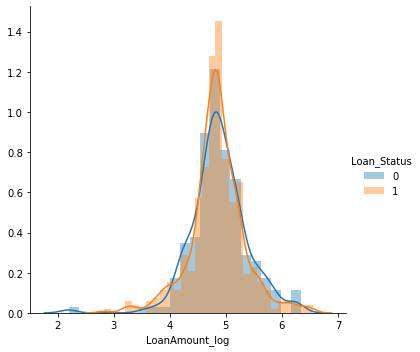

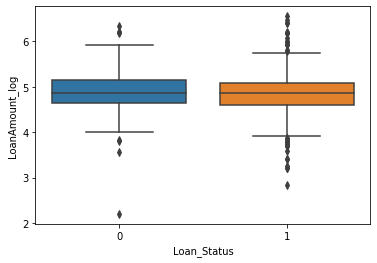

For :  ApplicantIncome_log


C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x1080 with 0 Axes>

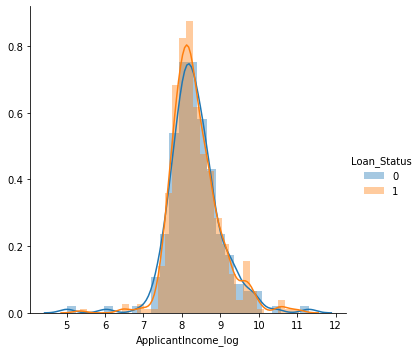

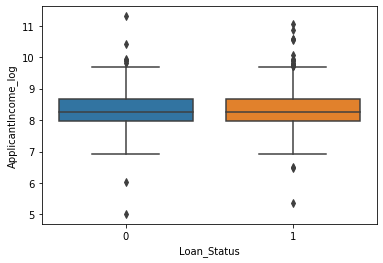

For :  Total_Income_log


C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x1080 with 0 Axes>

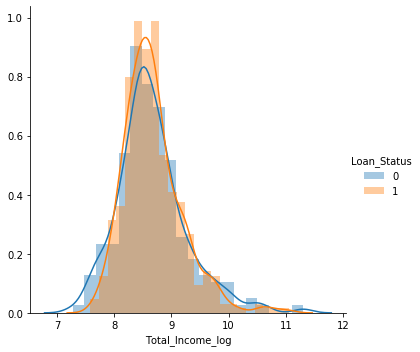

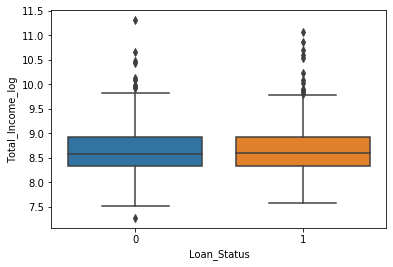

For :  EMI_log


C:\Users\eshan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1800x1080 with 0 Axes>

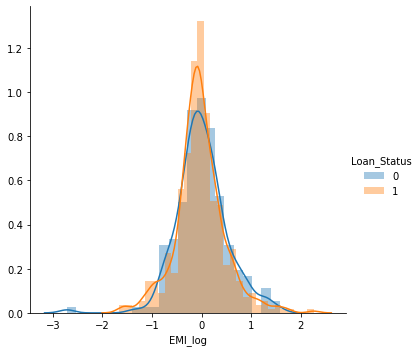

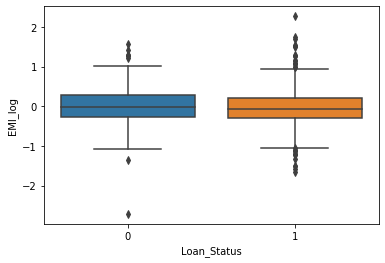

In [36]:
log_numeric = ["LoanAmount_log","ApplicantIncome_log","Total_Income_log","EMI_log"]

for x in log_numeric:
    f = plt.figure()
    f.set_size_inches(25,15)
    print("For : ",x)
    sns.FacetGrid(train_data, hue="Loan_Status",size=5) \
       .map(sns.distplot, x) \
       .add_legend();
    plt.show(); 
   
    sns.boxplot(x='Loan_Status',y=x, data=train_data)
    plt.show()

* Now features are nearly normaly distributed after log transformation of features

In [37]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Total_Income,Total_Income_bin,LoanAmount_bin,EMI,Income_left,EMI_bin,LoanAmount_log,ApplicantIncome_log,Total_Income_log,EMI_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,5849.0,High,High,0.939219,4909.781345,Average,4.852030,8.674026,8.674026,-0.062707
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,6091.0,Very high,High,0.939219,5151.781345,Average,4.852030,8.430109,8.714568,-0.062707
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,3000.0,Average,Average,0.484285,2515.715381,Low,4.189655,8.006368,8.006368,-0.725082


In [38]:
train_data=train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income','EMI_bin'], axis=1)
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,Income_left,LoanAmount_log,ApplicantIncome_log,Total_Income_log,EMI_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,0.939219,4909.781345,4.852030,8.674026,8.674026,-0.062707
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0.939219,5151.781345,4.852030,8.430109,8.714568,-0.062707
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0.484285,2515.715381,4.189655,8.006368,8.006368,-0.725082


# From above hypothesis :

* Education , ApplicantIncome , LoanAmount, Loan_Amount_Term, Credit_History , EMI and Total income which is ApplicantIncome  + CoapplicantIncome  gives proof of hypothesis related to CoapplicantIncome & ApplicantIncome


# Final Correlation Matrix

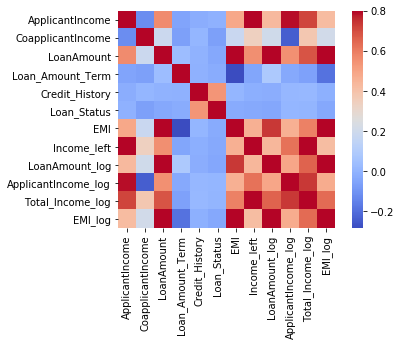

In [39]:
import pandas as pd
import numpy as np

train_data['Loan_Status'].replace('N', 0,inplace=True)
train_data['Loan_Status'].replace('Y', 1,inplace=True)

corr =train_data.corr()
sns.heatmap(corr, vmax=.8, square=True, cmap="coolwarm");
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


# End Of Notebook